In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/datasets/時価総額上位500社 - シート1.csv')

df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率'],
      dtype='object')

In [3]:

# すでにDataFrameがあると仮定して、すべての文字列型・object型のカラムでカンマを削除
df = df.applymap(lambda x: str(x).replace(',', '') if isinstance(x, (str)) else x)

# 数値型に変換できるものは自動で変換
df = df.apply(pd.to_numeric, errors='ignore')

# 結果の確認
df.dtypes

銘柄コード           object
会社名             object
時価総額             int64
PER(会予)        float64
PBR            float64
配当利回り(会予)      float64
売上高            float64
売上総利益率         float64
営業CF/売上比率      float64
販管費/売上比率       float64
営業利益           float64
営業利益率          float64
当期純利益          float64
純利益率           float64
ROE            float64
自己資本比率         float64
有利子負債/総資産      float64
有利子負債/時価総額     float64
純有利子負債/時価総額    float64
DEレシオ          float64
流動比率           float64
総資産            float64
現金及び預金         float64
売上債権           float64
売上債権回転数        float64
棚卸資産           float64
棚卸資産回転数        float64
有形固定資産         float64
固定負債           float64
有利子負債          float64
純有利子負債         float64
純資産            float64
自己資本           float64
フリーCF            int64
研究開発/売上比率      float64
dtype: object

In [4]:
df.describe()

,時価総額,PER(会予),PBR,配当利回り(会予),売上高,売上総利益率,営業CF/売上比率,販管費/売上比率,営業利益,営業利益率,...,棚卸資産,棚卸資産回転数,有形固定資産,固定負債,有利子負債,純有利子負債,純資産,自己資本,フリーCF,研究開発/売上比率
count,5.000000e+02,449.000000,499.000000,425.000000,4.980000e+02,441.000000,494.000000,441.000000,4.470000e+02,445.000000,...,4.220000e+02,409.000000,4.880000e+02,4.540000e+02,4.560000e+02,4.930000e+02,4.990000e+02,4.990000e+02,5.000000e+02,269.000000
mean,1.676723e+06,19.337416,2.163727,2.680941,1.652706e+06,34.790249,23.325304,23.265079,1.285000e+05,11.736180,...,2.441843e+05,104.851834,5.652349e+05,7.206830e+05,3.053043e+06,2.677639e+06,1.274928e+06,1.205240e+06,1.591334e+05,3.381041
std,3.280761e+06,15.848009,2.531208,1.369199,3.255602e+06,19.568319,60.044238,16.589475,3.158023e+05,11.205304,...,4.337906e+05,103.398978,1.194488e+06,2.117139e+06,1.852662e+07,1.777095e+07,2.678407e+06,2.522465e+06,5.750419e+05,4.826502
min,4.332600e+04,3.300000,0.200000,0.000000,1.062000e+03,1.300000,0.100000,1.600000,6.800000e+01,0.000000,...,0.000000e+00,0.700000,8.000000e+00,2.590000e+02,1.100000e+01,4.240000e+02,5.246000e+03,5.176000e+03,0.000000e+00,0.000000
25%,3.356112e+05,10.800000,0.800000,1.700000,2.874800e+05,19.800000,7.350000,11.500000,2.649300e+04,5.200000,...,2.795750e+04,35.000000,7.607225e+04,3.580100e+04,3.880425e+04,5.382400e+04,2.542860e+05,2.511195e+05,1.643975e+04,0.500000
50%,5.815680e+05,15.500000,1.300000,2.600000,6.567635e+05,30.800000,11.800000,19.700000,4.756800e+04,8.900000,...,9.160150e+04,74.600000,1.945820e+05,1.333605e+05,2.047800e+05,1.563120e+05,4.927030e+05,4.783900e+05,3.833500e+04,2.000000
75%,1.386258e+06,21.000000,2.300000,3.700000,1.636422e+06,45.600000,18.025000,29.000000,1.191225e+05,13.900000,...,2.421828e+05,137.300000,5.213328e+05,4.834145e+05,9.166238e+05,6.431280e+05,1.083634e+06,1.027713e+06,9.962925e+04,4.200000
max,3.640662e+07,155.300000,21.200000,6.600000,4.509532e+07,93.800000,745.100000,136.600000,5.352934e+06,112.800000,...,4.480884e+06,667.600000,1.540482e+07,2.837688e+07,2.645351e+08,2.645351e+08,3.685653e+07,3.591027e+07,1.030767e+07,35.800000


In [5]:
df = df.dropna(subset=['現金及び預金'])

df['PER(会予)'].isna().sum()

48

In [6]:
df = df[df['PER(会予)'] < 50]

df.describe()

,時価総額,PER(会予),PBR,配当利回り(会予),売上高,売上総利益率,営業CF/売上比率,販管費/売上比率,営業利益,営業利益率,...,棚卸資産,棚卸資産回転数,有形固定資産,固定負債,有利子負債,純有利子負債,純資産,自己資本,フリーCF,研究開発/売上比率
count,3.900000e+02,390.000000,390.000000,345.000000,3.900000e+02,375.000000,389.000000,375.000000,3.790000e+02,378.000000,...,3.630000e+02,353.000000,3.830000e+02,3.880000e+02,3.630000e+02,3.890000e+02,3.900000e+02,3.900000e+02,3.900000e+02,223.000000
mean,1.498851e+06,17.093333,2.125385,2.718841,1.614071e+06,33.651467,13.450386,22.099467,1.327020e+05,11.772222,...,2.480355e+05,103.130312,6.070931e+05,6.963470e+05,8.106542e+05,6.090443e+05,1.087233e+06,1.033934e+06,8.863813e+04,3.267713
std,2.968738e+06,8.530716,2.329325,1.321697,3.350350e+06,18.524408,10.515373,15.113082,3.353485e+05,11.051757,...,4.476738e+05,104.621783,1.285544e+06,2.019866e+06,2.475512e+06,1.691745e+06,2.382183e+06,2.289930e+06,1.797253e+05,4.822156
min,4.332600e+04,3.300000,0.300000,0.000000,1.299700e+04,4.000000,0.100000,1.600000,1.390000e+02,0.800000,...,7.300000e+01,0.700000,2.700000e+02,2.590000e+02,1.100000e+01,4.240000e+02,5.246000e+03,5.176000e+03,0.000000e+00,0.000000
25%,3.415072e+05,10.825000,0.900000,1.700000,3.084445e+05,19.700000,7.300000,11.400000,2.821350e+04,5.525000,...,2.799400e+04,34.100000,8.010550e+04,3.606050e+04,3.335550e+04,4.922300e+04,2.507830e+05,2.475670e+05,1.629500e+04,0.600000
50%,5.815680e+05,15.650000,1.350000,2.600000,6.752070e+05,30.500000,11.400000,18.900000,4.979200e+04,9.000000,...,8.969800e+04,73.800000,2.058280e+05,1.375410e+05,1.504320e+05,1.326400e+05,4.651715e+05,4.479070e+05,3.502950e+04,2.000000
75%,1.363376e+06,20.675000,2.300000,3.700000,1.636422e+06,43.200000,15.900000,28.000000,1.190575e+05,13.875000,...,2.421005e+05,134.000000,6.052240e+05,5.104658e+05,7.690645e+05,4.678930e+05,1.008511e+06,9.647302e+05,7.943525e+04,3.950000
max,3.640662e+07,49.800000,21.200000,6.600000,4.509532e+07,93.000000,76.900000,136.600000,5.352934e+06,112.800000,...,4.480884e+06,667.600000,1.540482e+07,2.837688e+07,3.957969e+07,2.569830e+07,3.685653e+07,3.591027e+07,2.025639e+06,35.800000


In [7]:
df.shape

(390, 35)

In [8]:
df['売上債権'].isna().sum()

118

In [9]:
# df = df[df['純有利子負債'].isna()][['銘柄コード' ,'会社名']]


In [10]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率'],
      dtype='object')

In [11]:
df['有形固定資産'] = df['有形固定資産'].fillna(0)
df['固定負債'] = df['固定負債'].fillna(0)
df['有利子負債/総資産'] = df['有利子負債/総資産'].fillna(0)
df['有利子負債'] = df['有利子負債'].fillna(0)

df[['有形固定資産', '固定負債', '有利子負債/総資産', '有利子負債']].isna().sum()

有形固定資産       0
固定負債         0
有利子負債/総資産    0
有利子負債        0
dtype: int64

In [12]:
df = df.dropna(subset=['現金及び預金'])

df['現金及び預金'].isna().sum()

0

In [13]:
df.shape

(390, 35)

## データの作成

### 固定ネットキャッシュ : 現預金 - 固定負債
### 固定ネットキャッシュ比率 : 固定ネットキャッシュ / 総資産

In [14]:
# 固定ネットキャッシュ
df['固定ネットキャッシュ'] = df['現金及び預金'] - df['固定負債']
# 固定ネットキャッシュ比率
df['固定ネットキャッシュ比率'] = (df['固定ネットキャッシュ'] / df['総資産']) * 100

df[['会社名', '現金及び預金', '固定負債', '総資産', '固定ネットキャッシュ', 
    '固定ネットキャッシュ比率']]

,会社名,現金及び預金,固定負債,総資産,固定ネットキャッシュ,固定ネットキャッシュ比率
0,本たばこ産業,1084567.0,2373398.0,8370732.0,-1288831.0,-15.396873
2,リクルートHD,871812.0,338888.0,2908790.0,532924.0,18.321158
3,立製作所,866242.0,1345551.0,13284813.0,-479309.0,-3.607947
4,ソニーG,2491949.0,16380543.0,35991547.0,-13888594.0,-38.588489
6,三菱重工業,542003.0,1018062.0,6825215.0,-476059.0,-6.975004
...,...,...,...,...,...,...
493,三菱食品,424.0,31361.0,888315.0,-30937.0,-3.482661
494,エイチ･ツー･オーリテイリング,62108.0,207419.0,739987.0,-145311.0,-19.636967
495,イズミ,15717.0,143442.0,569611.0,-127725.0,-22.423198
496,メイテックGHD,46110.0,17449.0,84898.0,28661.0,33.759335


### ネットキャッシュ比率

In [15]:
df['ネットキャッシュ'] = df['現金及び預金'] - df['有利子負債']
df['ネットキャッシュ比率'] = (df['ネットキャッシュ'] / df['総資産']) * 100

df[['会社名', '現金及び預金', '有利子負債', 'ネットキャッシュ', '総資産', 'ネットキャッシュ比率']]

,会社名,現金及び預金,有利子負債,ネットキャッシュ,総資産,ネットキャッシュ比率
0,本たばこ産業,1084567.0,1726788.0,-642221.0,8370732.0,-7.672220
2,リクルートHD,871812.0,200746.0,671066.0,2908790.0,23.070280
3,立製作所,866242.0,837298.0,28944.0,13284813.0,0.217873
4,ソニーG,2491949.0,2088195.0,403754.0,35991547.0,1.121802
6,三菱重工業,542003.0,0.0,542003.0,6825215.0,7.941186
...,...,...,...,...,...,...
493,三菱食品,424.0,0.0,424.0,888315.0,0.047731
494,エイチ･ツー･オーリテイリング,62108.0,164376.0,-102268.0,739987.0,-13.820243
495,イズミ,15717.0,139454.0,-123737.0,569611.0,-21.723071
496,メイテックGHD,46110.0,0.0,46110.0,84898.0,54.312234


### 有形固定資産/総資産

In [16]:
df['有形固定資産/総資産'] = (df['有形固定資産'] / df['総資産']) * 100

df[['会社名', '有形固定資産', '総資産', '有形固定資産/総資産']]

,会社名,有形固定資産,総資産,有形固定資産/総資産
0,本たばこ産業,907700.0,8370732.0,10.843735
2,リクルートHD,58041.0,2908790.0,1.995366
3,立製作所,1341537.0,13284813.0,10.098275
4,ソニーG,1526777.0,35991547.0,4.242043
6,三菱重工業,935150.0,6825215.0,13.701400
...,...,...,...,...
493,三菱食品,80605.0,888315.0,9.073921
494,エイチ･ツー･オーリテイリング,315518.0,739987.0,42.638317
495,イズミ,344469.0,569611.0,60.474429
496,メイテックGHD,4147.0,84898.0,4.884685


### 固定負債/総資産

In [17]:
df['固定負債/総資産'] = (df['固定負債'] / df['総資産'] ) * 100

df[['会社名', '固定負債', '総資産', '固定負債/総資産']]

,会社名,固定負債,総資産,固定負債/総資産
0,本たばこ産業,2373398.0,8370732.0,28.353530
2,リクルートHD,338888.0,2908790.0,11.650480
3,立製作所,1345551.0,13284813.0,10.128490
4,ソニーG,16380543.0,35991547.0,45.512195
6,三菱重工業,1018062.0,6825215.0,14.916189
...,...,...,...,...
493,三菱食品,31361.0,888315.0,3.530392
494,エイチ･ツー･オーリテイリング,207419.0,739987.0,28.030087
495,イズミ,143442.0,569611.0,25.182449
496,メイテックGHD,17449.0,84898.0,20.552899


In [18]:
df.isna().sum()

銘柄コード             0
会社名               0
時価総額              0
PER(会予)           0
PBR               0
配当利回り(会予)        45
売上高               0
売上総利益率           15
営業CF/売上比率         1
販管費/売上比率         15
営業利益             11
営業利益率            12
当期純利益             0
純利益率              0
ROE               7
自己資本比率            0
有利子負債/総資産         0
有利子負債/時価総額        0
純有利子負債/時価総額       0
DEレシオ            27
流動比率              2
総資産               0
現金及び預金            0
売上債権            118
売上債権回転数         118
棚卸資産             27
棚卸資産回転数          37
有形固定資産            0
固定負債              0
有利子負債             0
純有利子負債            1
純資産               0
自己資本              0
フリーCF             0
研究開発/売上比率       167
固定ネットキャッシュ        0
固定ネットキャッシュ比率      0
ネットキャッシュ          0
ネットキャッシュ比率        0
有形固定資産/総資産        0
固定負債/総資産          0
dtype: int64

## SelectKBest(特徴量選択)

In [19]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率', '固定ネットキャッシュ',
       '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産'],
      dtype='object')

In [20]:
sub_df = df.drop(columns=['銘柄コード', '会社名', '時価総額', '配当利回り(会予)',
                          '売上高', '営業利益', '当期純利益',
                          '純利益率', '総資産', '現金及び預金',
                          '売上債権', '棚卸資産', '有形固定資産',
                          '固定負債', '有利子負債', '純有利子負債',
                          '純資産', '自己資本', 'フリーCF',
                          '研究開発/売上比率', 'DEレシオ',
                          '売上債権回転数', '棚卸資産回転数'])

r_df = df.drop(columns=['時価総額', '配当利回り(会予)',
                          '売上高', '営業利益', '当期純利益',
                          '純利益率', '総資産', '現金及び預金',
                          '売上債権', '棚卸資産', '有形固定資産',
                          '固定負債', '有利子負債', '純有利子負債',
                          '純資産', '自己資本', 'フリーCF',
                          '研究開発/売上比率', 'DEレシオ',
                          '売上債権回転数', '棚卸資産回転数'])
sub_df.columns

Index(['PER(会予)', 'PBR', '売上総利益率', '営業CF/売上比率', '販管費/売上比率', '営業利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率',
       '固定ネットキャッシュ', '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産',
       '固定負債/総資産'],
      dtype='object')

In [21]:
sub_df.isna().sum()

PER(会予)          0
PBR              0
売上総利益率          15
営業CF/売上比率        1
販管費/売上比率        15
営業利益率           12
ROE              7
自己資本比率           0
有利子負債/総資産        0
有利子負債/時価総額       0
純有利子負債/時価総額      0
流動比率             2
固定ネットキャッシュ       0
固定ネットキャッシュ比率     0
ネットキャッシュ         0
ネットキャッシュ比率       0
有形固定資産/総資産       0
固定負債/総資産         0
dtype: int64

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#r_df = df[['PER(会予)', '営業CF/売上比率', '営業利益率', 'ROE',
#           '自己資本比率', '有利子負債/総資産', 'ネットキャッシュ比率',
#           '固定ネットキャッシュ比率', '有形固定資産/総資産',
#           '固定負債/総資産', 'PBR']]

sub_df.dropna(inplace=True)

X = sub_df.drop(columns=['PBR'])
y = sub_df['PBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SelectKBestでf_regressionを使用
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())  #選ばれた特徴量

[ True  True False False  True  True False False False False False False
  True False False False False]


In [23]:
# X =  PER、売上総利益率, 営業利益率, ROE, 固定ネットキャッシュ比率

In [24]:
X.columns

Index(['PER(会予)', '売上総利益率', '営業CF/売上比率', '販管費/売上比率', '営業利益率', 'ROE', '自己資本比率',
       '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率', '固定ネットキャッシュ',
       '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産'],
      dtype='object')

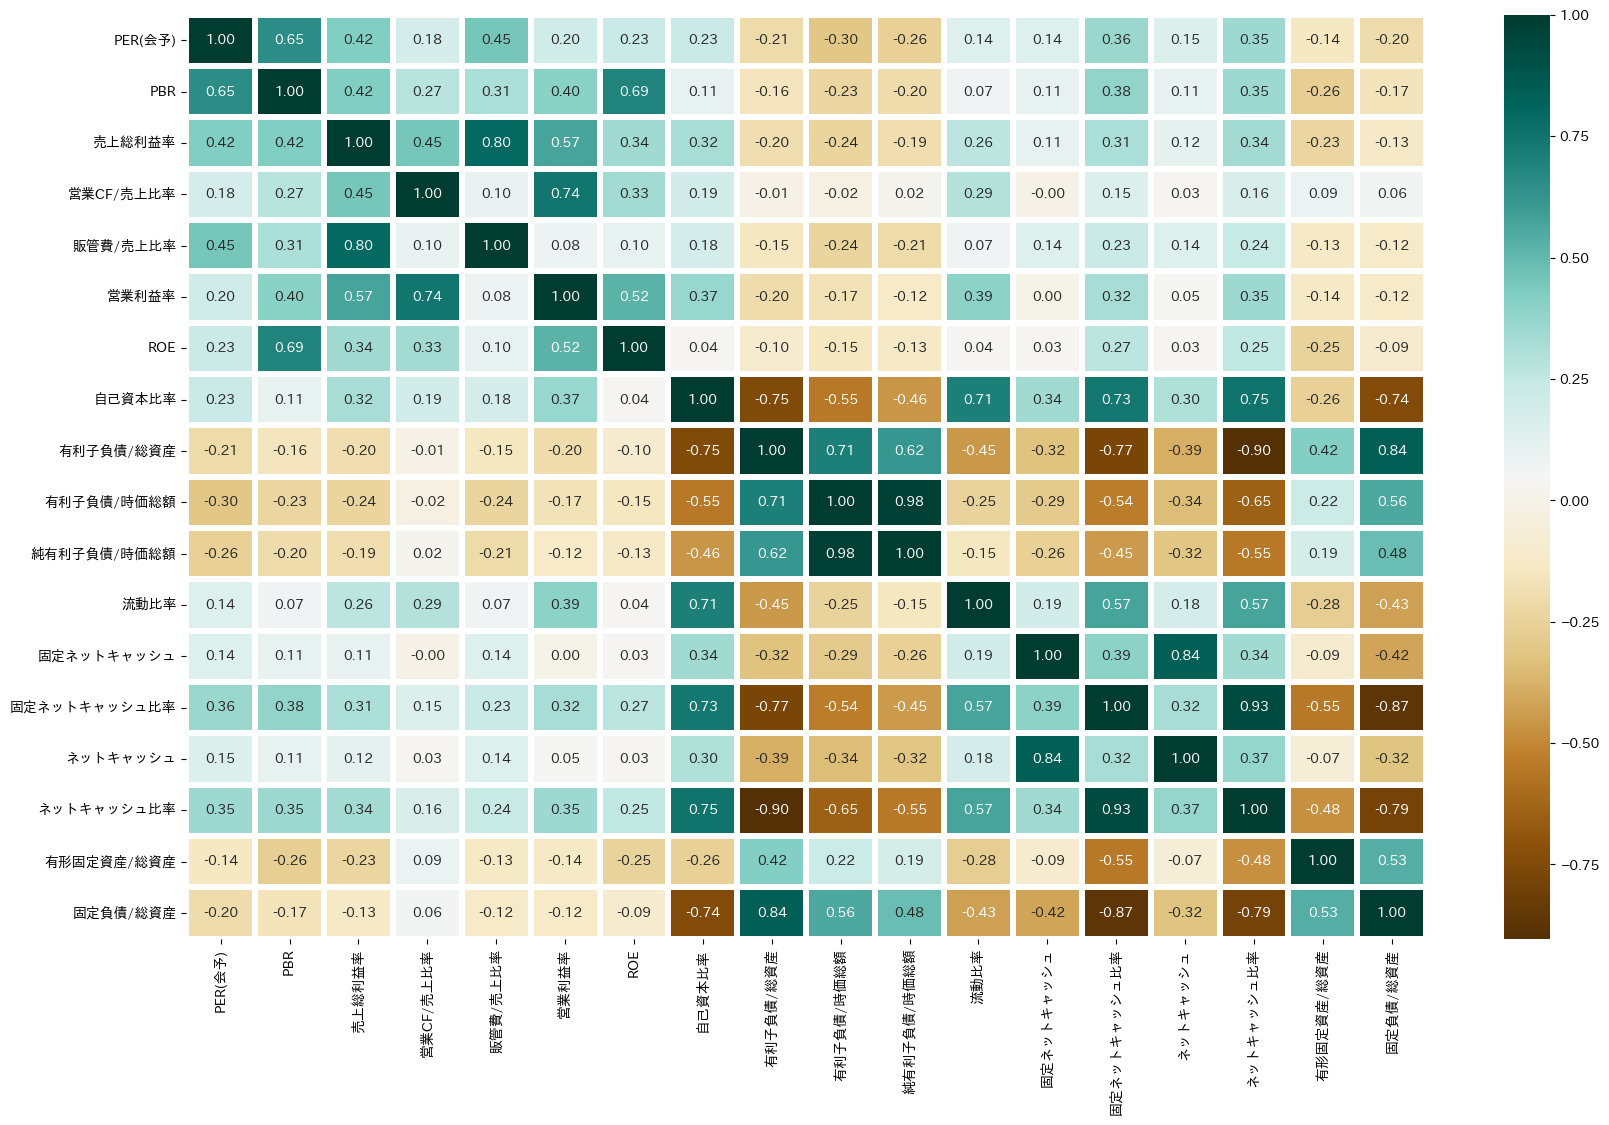

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = sub_df.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

## 本番

In [26]:
sub_df.shape

(355, 18)

In [27]:
r_df.shape

(390, 20)

In [28]:
r_df.head()

,銘柄コード,会社名,PER(会予),PBR,売上総利益率,営業CF/売上比率,販管費/売上比率,営業利益率,ROE,自己資本比率,有利子負債/総資産,有利子負債/時価総額,純有利子負債/時価総額,流動比率,固定ネットキャッシュ,固定ネットキャッシュ比率,ネットキャッシュ,ネットキャッシュ比率,有形固定資産/総資産,固定負債/総資産
0,2914,本たばこ産業,17.7,2.1,55.3,20.0,46.4,10.3,4.8,45.0,20.6,21.7,6.6,166.5,-1288831.0,-15.396873,-642221.0,-7.672220,10.843735,28.353530
2,6098,リクルートHD,30.4,6.8,57.5,15.7,44.5,11.8,19.7,61.8,6.9,1.6,5.5,203.5,532924.0,18.321158,671066.0,23.070280,1.995366,11.650480
3,6501,立製作所,23.7,2.9,28.8,12.0,18.9,9.9,10.5,44.0,6.3,5.0,0.2,111.7,-479309.0,-3.607947,28944.0,0.217873,10.098275,10.128490
4,6758,ソニーG,20.8,2.7,28.2,12.2,19.1,10.7,11.9,22.7,5.8,9.3,2.5,68.2,-13888594.0,-38.588489,403754.0,1.121802,4.242043,45.512195
6,7011,三菱重工業,39.1,4.0,20.0,7.1,14.9,NaN,9.5,34.2,0.0,0.0,6.3,120.1,-476059.0,-6.975004,542003.0,7.941186,13.701400,14.916189


In [29]:
r_df.columns

Index(['銘柄コード', '会社名', 'PER(会予)', 'PBR', '売上総利益率', '営業CF/売上比率', '販管費/売上比率',
       '営業利益率', 'ROE', '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額',
       '流動比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率',
       '有形固定資産/総資産', '固定負債/総資産'],
      dtype='object')

In [30]:

# X =  PER、売上総利益率, 営業利益率, ROE, 固定ネットキャッシュ比率
r_df = r_df[['銘柄コード', '会社名', 'PER(会予)','ROE',
             '固定ネットキャッシュ比率', 'PBR', '自己資本比率',
             '有形固定資産/総資産', 'ネットキャッシュ比率']]

r_df.head()

,銘柄コード,会社名,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率
0,2914,本たばこ産業,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220
2,6098,リクルートHD,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280
3,6501,立製作所,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873
4,6758,ソニーG,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802
6,7011,三菱重工業,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186


In [31]:
df['ネットキャッシュ比率'].isna().sum()

0

In [32]:
r_df.shape

(390, 9)

In [33]:
r_df.isna().sum()

銘柄コード           0
会社名             0
PER(会予)         0
ROE             7
固定ネットキャッシュ比率    0
PBR             0
自己資本比率          0
有形固定資産/総資産      0
ネットキャッシュ比率      0
dtype: int64

In [34]:
r_df.dropna(inplace=True)
company_names = r_df[['銘柄コード', '会社名']]

r_df = r_df.drop(columns=['銘柄コード', '会社名'])

r_df.shape

(383, 7)

In [35]:
r_df.columns

Index(['PER(会予)', 'ROE', '固定ネットキャッシュ比率', 'PBR', '自己資本比率', '有形固定資産/総資産',
       'ネットキャッシュ比率'],
      dtype='object')

In [36]:
company_names.shape

(383, 2)

In [37]:
r_df.head()

,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率
0,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220
2,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280
3,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873
4,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802
6,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186


In [38]:
X = r_df[['PER(会予)', 'ROE', '自己資本比率', '固定ネットキャッシュ比率']]
# X = r_df.drop(columns=['PBR', '売上総利益率', '自己資本比率'])
y = r_df['PBR']

corr = r_df[['PER(会予)', 'ROE', '自己資本比率', '固定ネットキャッシュ比率', 'PBR']]

In [39]:
X.shape

(383, 4)

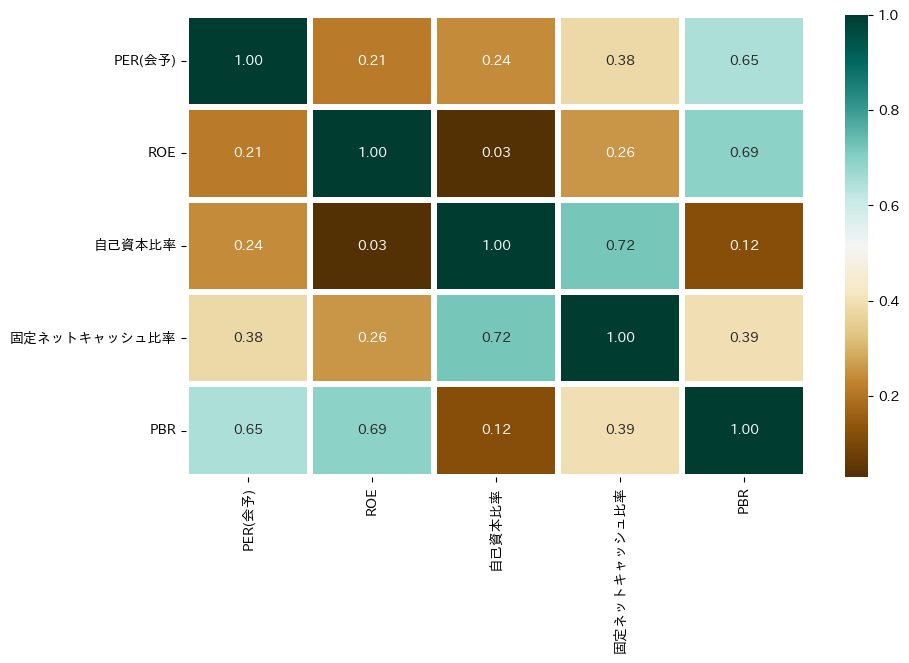

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = corr.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

### 交差検証

In [41]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pipe_line = make_pipeline(StandardScaler(), LinearRegression())

r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
# MSEは負の値で返されるので、符号を変換して表示
print('平均二乗誤差 (MSE): {}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
# MAEは負の値で返されるので、符号を変換して表示
print('平均絶対誤差 (MAE): {}'.format(np.mean(mae_scores)))

決定係数 (R²) scores: [0.84005198 0.77091882 0.66507778 0.59050087 0.7653389 ]
平均決定係数 (R²): 0.7263776711620016
平均二乗誤差 (MSE) scores: [-0.91909439 -1.8405724  -0.80253104 -2.86329787 -0.70242159]
平均二乗誤差 (MSE): -1.4255834593617136
平均絶対誤差 (MAE) scores: [-0.62088427 -0.75559145 -0.67444159 -0.76430844 -0.65760129]
平均絶対誤差 (MAE): -0.6945654085534626


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ridge回帰の交差検証付きモデル
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

# パイプラインの作成
pipe_line = make_pipeline(StandardScaler(), ridge_cv_model)

# 1. 決定係数 (R²)
r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
print('平均二乗誤差 (MSE): {}'.format(-np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
print('平均絶対誤差 (MAE): {}'.format(-np.mean(mae_scores)))

決定係数 (R²) scores: [0.83882685 0.76404137 0.67889288 0.58736083 0.78042533]
平均決定係数 (R²): 0.7299094525693106
平均二乗誤差 (MSE) scores: [-0.92613426 -1.8958299  -0.76942768 -2.88525363 -0.65726272]
平均二乗誤差 (MSE): 1.4267816367933812
平均絶対誤差 (MAE) scores: [-0.61586828 -0.75838168 -0.65627791 -0.7472006  -0.62722853]
平均絶対誤差 (MAE): 0.6809914004615446


In [43]:
X

,PER(会予),ROE,自己資本比率,固定ネットキャッシュ比率
0,17.7,4.8,45.0,-15.396873
2,30.4,19.7,61.8,18.321158
3,23.7,10.5,44.0,-3.607947
4,20.8,11.9,22.7,-38.588489
6,39.1,9.5,34.2,-6.975004
...,...,...,...,...
493,10.2,10.6,24.0,-3.482661
494,7.7,7.5,39.7,-19.636967
495,12.8,4.2,50.1,-22.423198
496,19.3,27.2,53.5,33.759335


### 予測モデル構築

In [44]:
company_names_col = company_names[['銘柄コード','会社名']]

company_names_col

,銘柄コード,会社名
0,2914,本たばこ産業
2,6098,リクルートHD
3,6501,立製作所
4,6758,ソニーG
6,7011,三菱重工業
...,...,...
493,7451,三菱食品
494,8242,エイチ･ツー･オーリテイリング
495,8273,イズミ
496,9744,メイテックGHD


In [45]:
from sklearn.linear_model import RidgeCV


sc = StandardScaler()
X_sc = sc.fit_transform(X)

lr = RidgeCV(alphas=(0.1, 1.0, 10.0))
lr.fit(X_sc, y)

lr_pred = lr.predict(X_sc)

r_df = r_df.copy()

r_df['予測PBR'] = lr_pred
r_df['予測誤差'] = r_df['PBR'] - lr_pred
r_df['PBRレシオ'] =  lr_pred / r_df['PBR']
r_df[['銘柄コード', '会社名']] = company_names_col


r_df.head(10)

,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率,予測PBR,予測誤差,PBRレシオ,銘柄コード,会社名
0,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220,0.914883,1.185117,0.435659,2914,本たばこ産業
2,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280,5.939465,0.860535,0.873451,6098,リクルートHD
3,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873,3.100178,-0.200178,1.069027,6501,立製作所
4,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802,2.810904,-0.110904,1.041076,6758,ソニーG
6,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186,5.113911,-1.113911,1.278478,7011,三菱重工業
7,8.1,13.8,-21.221911,1.0,37.9,16.271369,-33.054896,1.474792,-0.474792,1.474792,7203,トヨタ自動車
9,11.1,15.3,-25.157451,1.7,38.0,14.744014,-44.903221,2.130574,-0.430574,1.253279,8001,伊藤忠商事
10,17.1,29.6,12.315169,5.3,70.1,16.820609,15.850838,5.917835,-0.617835,1.116573,8035,東京エレクトロン
11,15.0,10.1,-18.245809,1.1,43.6,13.365264,-32.942835,1.611054,-0.511054,1.464595,8058,三菱商事
15,11.4,12.6,-28.661270,1.2,33.2,34.204582,0.278489,1.645059,-0.445059,1.370882,9432,本電信電話


In [46]:
lr_pred.shape

(383,)

In [47]:
y.shape

(383,)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 評価指標の表示
print("決定係数 (R²):", r2_score(y, lr_pred))
print("平均二乗誤差 (MSE):", mean_squared_error(y, lr_pred))
print("平均絶対誤差 (MAE):", mean_absolute_error(y, lr_pred))

決定係数 (R²): 0.7519862856840814
平均二乗誤差 (MSE): 1.332287560225087
平均絶対誤差 (MAE): 0.6724869852188468


In [49]:
print('係数:', lr.coef_)
print('切片:', lr.intercept_)

係数: [ 1.17067059  1.26542988 -0.30027281  0.35732562]
切片: 2.107049608355091


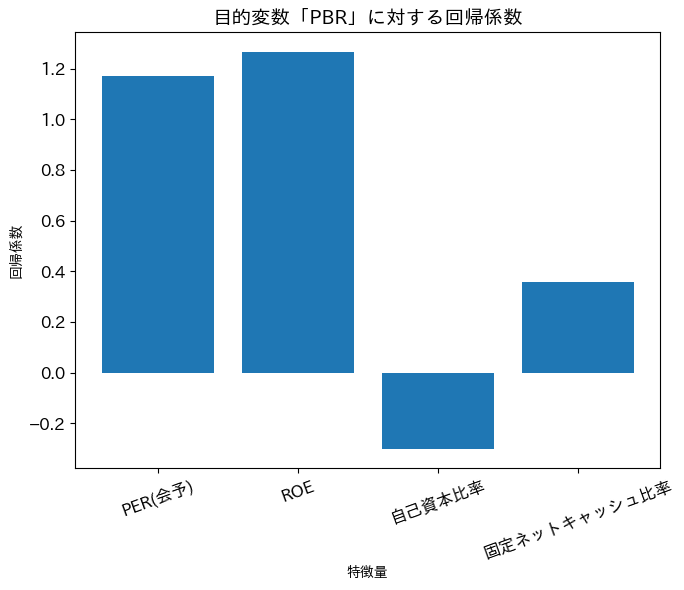

In [50]:
import matplotlib.pyplot as plt
import japanize_matplotlib

feature_names = X.columns
coefficients = lr.coef_

plt.figure(figsize=(7, 6))
bars = plt.bar(feature_names, coefficients)

plt.xlabel('特徴量')
plt.ylabel('回帰係数')
plt.title('目的変数「PBR」に対する回帰係数', fontsize=14)

# 特徴量のラベル（x軸のラベル）を大きく、角度も調整
plt.xticks(fontsize=12, rotation=20)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


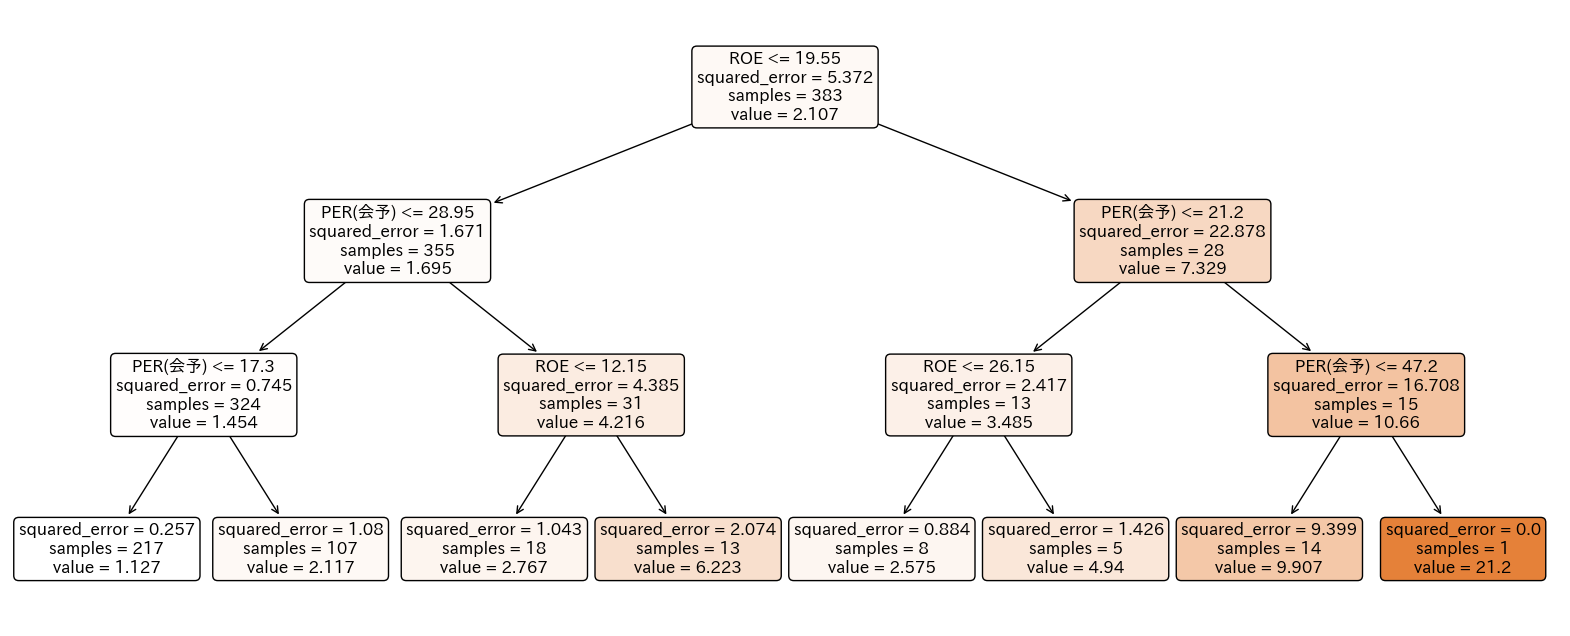

In [51]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# モデル作成と学習
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X, y)

# 回帰木の描画
plt.figure(figsize=(20, 8))  # サイズ調整（横12インチ × 縦8インチなど）
plot_tree(
    dtree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()

In [52]:
lr_pred.shape

(383,)

In [53]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['明豊ファシリティワークス', 'AREHD', '湖北工業', 'アドバンテッジリスクマネジメント', '相鉄HD',
                 'ナレルグループ', '岡村製作所', 'NexTone', 'グリーンズ']

# 特徴量データ 予想PER, ROE, 自己資本比率, 固定ネットキャッシュ比率,)
X_new = np.array([
    [11.9, 14.8, 69.5, 0],      # 明豊ファシリティワークス
    [8.4, 11.3, 25.8, -7],       # AREHD
    [16.9, 13.9, 83.3, 14.23],      # 湖北工業
    [12.2, 19.03, 44.8, -1.64],   # アドバンテッジリスクマネジメント
    [10.0, 12.3, 24.0, -54.81],   # 相鉄HD
    [8.3, 16.2, 58.7, 2.56],    # ナレルグループ
    [9.2, 11.9, 64, -7.74], # 岡村製作所
    [15.8, 25.22, 32.1, 61.25], # NexTone
    [6.7, 30, 29.4, -9.09], # グリーンズ
#    [12.04, 9.08, 19.6, ], # 三菱UFJ 
])

# 特徴量名 (4つに合わせる)
feature_names = list(X.columns)

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = lr.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
result_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,会社名,PER(会予),ROE,自己資本比率,固定ネットキャッシュ比率,予測PBR
0,明豊ファシリティワークス,11.9,14.80,69.5,0.00,1.996519
1,AREHD,8.4,11.30,25.8,-7.00,1.423122
2,湖北工業,16.9,13.90,83.3,14.23,2.483351
3,アドバンテッジリスクマネジメント,12.2,19.03,44.8,-1.64,3.291224
4,相鉄HD,10.0,12.30,24.0,-54.81,1.145820
5,ナレルグループ,8.3,16.20,58.7,2.56,2.010272
6,岡村製作所,9.2,11.90,64.0,-7.74,1.006586
7,NexTone,15.8,25.22,32.1,61.25,6.225251
8,グリーンズ,6.7,30.00,29.4,-9.09,4.929183


In [54]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [15.8, 20, 32.1, 61.25],  # NexTone(ROE抑えめ)
     [18.2, 10.4, 55.4, 36.96], # 日水コン
     [17.8, 15.2, 76.8, 48.88], # インターメスティック
     [10.2, 7.1, 48.2, 10.72], # ワッツ
     [19.6, 2.3, 80.3, 43.73], # はてな
     [12.4, 15.3, 79.5, 19.38], # アイティーフォー
     [6.6, 6.9, 41.5, -35.82], # アサックス
     [6.7, 40, 36.6, -3.96], # グリーンズ
     [14.4, 15.5, 82, 63.36], # 福井コンピュータHD
     [8.5, 14.8, 45, 13.34], # CSS HD
     [13.7, 10.5, 71.1, 35.82], # ウィッツ
     [10.7, 8.4, 81.4, 51.37]
])


X_new_sc = sc.transform(X_new)

lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 5.15594959,  2.75741664,  3.51106715,  0.70607423,  0.97759336,
        2.29676934, -0.42713057,  6.9359265 ,  3.24207046,  2.14432973,
        1.88290042,  1.10822736])

In [55]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [17, 11.8, 17.2, -37.14],  # NexTone(ROE抑えめ)
     [44.8, 2.3, 47.3, 31.78],
     [14.4, 4.3, 72.6, 19.15],
     [15.6, 13.88, 81.68, 24.47], # 湖北工業(24.12通期)
     [15.6, 15, 75, 20], # 湖北工業（改善後）
])


X_new_sc = sc.transform(X_new)

lr_pred = lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2.38457643, 4.79264445, 0.42866821, 2.48504699, 2.75761538])

In [56]:
new_df = result_df[['会社名', '予測PBR']]

new_df

,会社名,予測PBR
0,明豊ファシリティワークス,1.996519
1,AREHD,1.423122
2,湖北工業,2.483351
3,アドバンテッジリスクマネジメント,3.291224
4,相鉄HD,1.145820
5,ナレルグループ,2.010272
6,岡村製作所,1.006586
7,NexTone,6.225251
8,グリーンズ,4.929183


In [57]:
new_df['実績PBR'] = [1.9, 1.0, 2.3, 2.4, 1.1, 1.5, 1.1, 4.2]

new_df

ValueError: Length of values (8) does not match length of index (9)

In [ ]:
new_df['PBR-Ratio'] = new_df['予測PBR'] / new_df['実績PBR']

df_sorted = new_df.sort_values(by='PBR-Ratio', ascending=False)

df_sorted

/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_36622/3771652304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PBR-Ratio'] = new_df['予測PBR'] / new_df['実績PBR']


,会社名,予測PBR,実績PBR,PBR-Ratio
7,NexTone,6.225251,4.2,1.482203
1,AREHD,1.423122,1.0,1.423122
3,アドバンテッジリスクマネジメント,3.291224,2.4,1.371343
5,ナレルグループ,2.010272,1.5,1.340181
2,湖北工業,2.483351,2.3,1.079718
0,明豊ファシリティワークス,1.996519,1.9,1.050800
4,相鉄HD,1.145820,1.1,1.041654
6,岡村製作所,1.006586,1.1,0.915078


In [ ]:
new_df.describe()

,予測PBR,実績PBR,PBR-Ratio
count,8.000000,8.000000,8.000000
mean,2.447768,1.937500,1.213012
std,1.698700,1.064945,0.213829
min,1.006586,1.000000,0.915078
25%,1.353796,1.100000,1.048513
50%,2.003395,1.700000,1.209950
75%,2.685319,2.325000,1.384288
max,6.225251,4.200000,1.482203
